/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARMA(0,0) - AIC: -248.67139944553682


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARMA(0,1) - AIC: -575.2525440505951
ARMA(1,0) - AIC: -1186.3381340308877


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information 

ARMA(1,1) - AIC: -1184.4678398355181
Best p, q combination: ARMA(1, 0) with AIC: -1186.3381340308877
                               SARIMAX Results                                
Dep. Variable:                   rate   No. Observations:                  300
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 596.169
Date:                Sat, 05 Oct 2024   AIC                          -1186.338
Time:                        02:36:47   BIC                          -1175.227
Sample:                    01-01-1999   HQIC                         -1181.891
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1734      0.099     11.843      0.000       0.979       1.368
ar.L1          0.9785      0.0

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


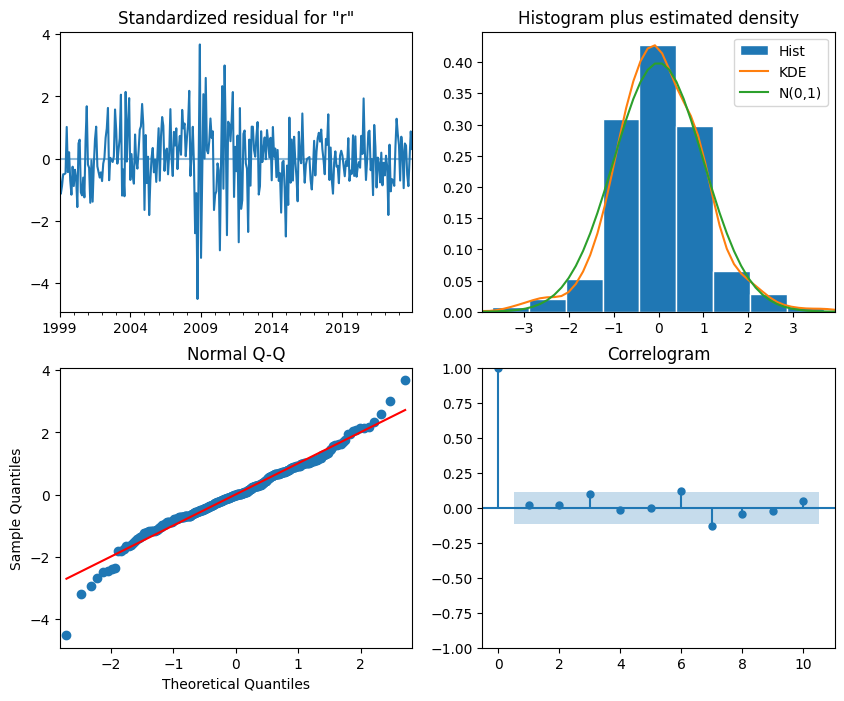

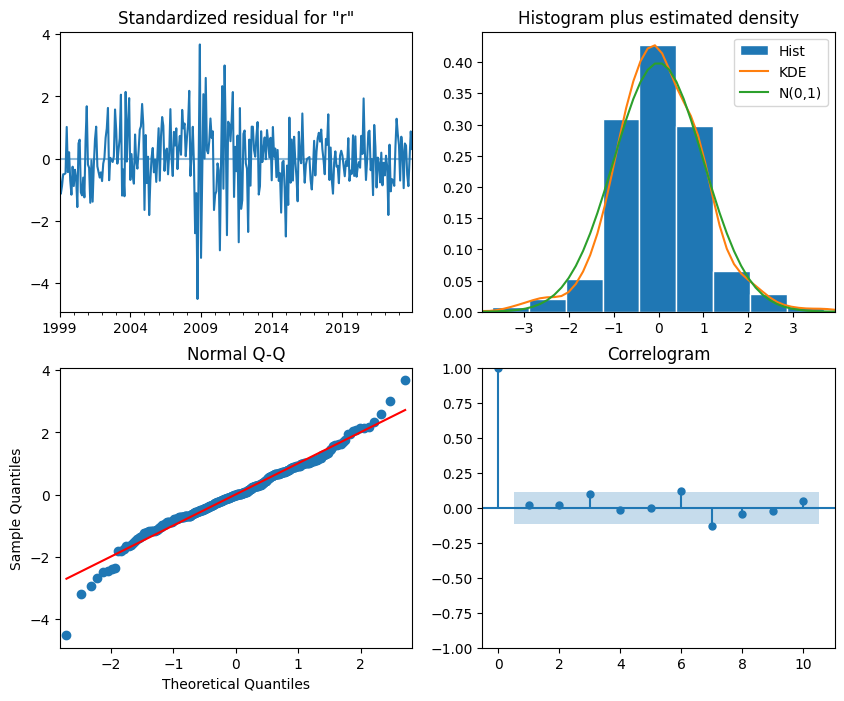

In [2]:
########################################### part a ###########################################

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Step 1: Load the data
file_path = 'Data.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Step 2: Ensure the 'date' column is in datetime format and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Step 3: Check for missing values (optional)
df = df.dropna()

# Step 4: Function to fit ARMA and return AIC
def fit_arma_model(p, q, data):
    try:
        model = ARIMA(data, order=(p, 0, q))
        model_fit = model.fit()
        return model_fit.aic
    except Exception as e:
        return None

# Step 5: Grid search for the best p and q (adjust ranges as needed)
best_aic = float("inf")
best_p, best_q = None, None
for p in range(2):  # Try p from 0 to 4
    for q in range(2):  # Try q from 0 to 4
        aic = fit_arma_model(p, q, df['rate'])
        if aic is not None and aic < best_aic:
            best_aic = aic
            best_p, best_q = p, q
        print(f"ARMA({p},{q}) - AIC: {aic}")

# Step 6: Print the best p and q values
print(f"Best p, q combination: ARMA({best_p}, {best_q}) with AIC: {best_aic}")

# Step 7: Fit the best ARMA model
best_model = ARIMA(df['rate'], order=(best_p, 0, best_q))
best_model_fit = best_model.fit()

# Summary of the best model
print(best_model_fit.summary())

# Diagnostics
best_model_fit.plot_diagnostics(figsize=(10, 8))


In [3]:
######################################### part b ###########################################


# Step 1: Perform the forecast for 1, 2, and 3 steps ahead
forecast_steps = 3  # We want to forecast three steps ahead

# Use the fitted model to generate forecasts
forecast_result = best_model_fit.get_forecast(steps=forecast_steps)

# Step 2: Get the forecasted mean and confidence intervals
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

# Print the forecast results
print("One, Two, and Three Steps Ahead Forecasts:")
print(forecast_mean)

# Step 3: Print confidence intervals
print("\nConfidence Intervals:")
print(forecast_conf_int)

One, Two, and Three Steps Ahead Forecasts:
2024-01-01    1.106474
2024-02-01    1.107916
2024-03-01    1.109326
Freq: MS, Name: predicted_mean, dtype: float64

Confidence Intervals:
            lower rate  upper rate
2024-01-01    1.041816    1.171131
2024-02-01    1.017456    1.198376
2024-03-01    0.999714    1.218939


In [4]:
######################################### part c ###########################################

import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame `data` with the column 'y'
# Create lagged variable
df['rate_lag'] = df['rate'].shift(1)

# Drop rows with NaN values (first row will have NaN for lag)
data = df.dropna()

# Define the dependent and independent variables
y = data['rate']
y_lag = data['rate_lag']

# Add a constant for the intercept
X = sm.add_constant(y_lag)

# Run the regression
model = sm.OLS(y, X).fit()

# Get the coefficient for y_lag
largest_root_estimate = model.params['rate_lag']

# Print the regression results and the estimate
print(model.summary())
print("\nEstimated Largest Root (Coefficient of y_t-1):", largest_root_estimate)

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     6583.
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          9.98e-205
Time:                        02:36:50   Log-Likelihood:                 595.29
No. Observations:                 299   AIC:                            -1187.
Df Residuals:                     297   BIC:                            -1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0255      0.014      1.762      0.0

In [6]:
######################################### part d ###########################################

from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test without constant
adf_result = adfuller(df['rate'], regression='n')

# Print the test statistic and p-value
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Print critical values
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -0.29325248312587804
p-value: 0.5786687379942329
Critical Values:
   1%: -2.5732581619892394
   5%: -1.9419347991101983
   10%: -1.6159611144234243
